In [46]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
MODEL=[]
RESOLUTION = []
INCH = []
PIXEL = []
os=[]
PRICE=[]
RATINGS=[]
CLARITY = []
warranty_in_years= []
Launchyear = []
MRP = []
for i in range(1,26):
    url=f"https://www.flipkart.com/search?q=smart+tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY{i}"
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    page = requests.get(url,headers =request_header)
    soup = BeautifulSoup(page.text)
    import re
    import numpy as np
    for i in soup.find_all("div",class_="KzDlHZ"):
        text1=i.text
        regex1=re.findall('\w+',text1)
        if regex1:
            MODEL.append(regex1[0])
        else:
            MODEL.append(np.nan)
    
    for i in soup.find_all("div",class_="KzDlHZ"):
        text2=i.text
        regex2=re.findall('\((\d+)K\)',text2)
        if regex2:
            RESOLUTION.append(regex2[0])
        else:
            RESOLUTION.append(np.nan)
            
    for i in soup.find_all("div",class_="yKfJKb row"):
        text3=i.text
        regex3=re.findall('\((\d+)\s*[iI]nch\)',text3)
        if regex3:
            INCH.append(regex3[0])
        else:
            INCH.append(np.nan)
    for i in soup.find_all("div",class_="yKfJKb row"):
        text31=i.text
        regex31=re.findall('(\d+)\s*x\s*(\d+)\s*Pixels',text31)
        if regex31:
            PIXEL.append(regex31[0])
        else:
            PIXEL.append(np.nan)
    for i in soup.find_all("div", class_="yKfJKb row"):
        text4 = i.text
        regex4 = re.findall("Operating System:\s*([^\n]+?)(?=HD Ready|Full HD|Ultra HD|Launch Year|$)", text4)
        if regex4:
            os.append(regex4[0])
        else:
            os.append(np.nan)
    for i in soup.find_all("div",class_="Nx9bqj _4b5DiR"):
        text5 = i.text
        text_replace = text5.replace('₹','').replace(',','')
        if text5:
            PRICE.append(text_replace)
        else:
            PRICE.append(np.nan)
    for i in soup.find_all('div',class_='tUxRFH'):
        ratings = i.find('div',class_='XQDdHH')
        if ratings:
            text6 = ratings.text
            RATINGS.append(text6)
        else:
            RATINGS.append(np.nan)
    for i in soup.find_all('div',class_='tUxRFH'):
        LAUNCH_YEAR = i.find('li',class_='J+igdf')
        if LAUNCH_YEAR:
            text7 = i.text
            regex7 = re.findall("Launch Year:\s(\d{4})",text7)
            if regex7:
                Launchyear.append(regex7[0])
            else:
                Launchyear.append(np.nan)
    for i in soup.find_all('div',class_='tUxRFH'):
        WARRANTY = i.find('li',class_='J+igdf')
        if WARRANTY:
            text8 = i.text
            regex8 = re.findall("(\d)\sYear|Years",text8)
            if regex8:
                warranty_in_years.append(regex8[0])
            else:
                warranty_in_years.append(np.nan)
        
    for i in soup.find_all("div",class_="yRaY8j ZYYwLA"):
        text9 = i.text
        text_replace9 = text9.replace('₹','').replace(',','')
        if text9:
            MRP.append(text_replace9)
        else:
            MRP.append(np.nan)

In [47]:
dict={"MODEL":MODEL,"OS":os,"PIXEL":PIXEL,'INCH':INCH,"LAUNCHYEAR":Launchyear,"PRICE":PRICE,"RATINGS":RATINGS,"WARRANTY(YRS)":warranty_in_years}

In [48]:
df=pd.DataFrame(dict)
df

,MODEL,OS,PIXEL,INCH,LAUNCHYEAR,PRICE,RATINGS,WARRANTY(YRS)
0,Thomson,Android,"(1366, 768)",32,2023,10499,4.3,1
1,Thomson,Google TV,"(3840, 2160)",65,2023,44999,4.5,1
2,Mi,Google TV,"(1366, 768)",32,2024,12990,4.3,1
3,Infinix,Linux,"(1366, 768)",32,2024,8499,4.2,1
4,Coocaa,Coolita,"(1920, 1080)",43,2024,12499,4.2,1
...,...,...,...,...,...,...,...,...
595,Acer,Google TV,"(1366, 768)",32,2024,9999,4.1,1
596,Coocaa,Coolita,"(1366, 768)",32,2024,7999,4.2,1
597,MOTOROLA,Google TV,"(3840, 2160)",55,2023,31999,4.3,1
598,Acer,Google TV,"(1366, 768)",32,2024,10499,4.2,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MODEL          600 non-null    object
 1   OS             600 non-null    object
 2   PIXEL          556 non-null    object
 3   INCH           600 non-null    object
 4   LAUNCHYEAR     600 non-null    object
 5   PRICE          600 non-null    object
 6   RATINGS        600 non-null    object
 7   WARRANTY(YRS)  600 non-null    object
dtypes: object(8)
memory usage: 37.6+ KB


In [40]:
df.describe()

,model,OS,PIXEL,INCH,LAUNCHYEAR,price,MRP,ratings,warranty(years)
count,600,520,565,600,600,600,600,600,600
unique,12,5,4,8,4,27,30,7,2
top,Thomson,Google,"(1366, 768)",32,2024,12990,24999,4.3,1
freq,135,270,260,320,370,75,65,175,530


In [59]:
df['WARRANTY(YRS)']=df['WARRANTY(YRS)'].astype(int)
df['LAUNCHYEAR']=df['LAUNCHYEAR'].astype(int)
df['INCH']=df['INCH'].astype(int)
df['PRICE']=df['PRICE'].astype(int)
df['RATINGS']=df['RATINGS'].astype(float)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MODEL          600 non-null    object 
 1   OS             600 non-null    object 
 2   PIXEL          556 non-null    object 
 3   INCH           600 non-null    int32  
 4   LAUNCHYEAR     600 non-null    int32  
 5   PRICE          600 non-null    int32  
 6   RATINGS        600 non-null    float64
 7   WARRANTY(YRS)  600 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 28.3+ KB


In [63]:
df = df.dropna(axis=0)

In [64]:
df

,MODEL,OS,PIXEL,INCH,LAUNCHYEAR,PRICE,RATINGS,WARRANTY(YRS)
0,Thomson,Android,"(1366, 768)",32,2023,10499,4.3,1
1,Thomson,Google TV,"(3840, 2160)",65,2023,44999,4.5,1
2,Mi,Google TV,"(1366, 768)",32,2024,12990,4.3,1
3,Infinix,Linux,"(1366, 768)",32,2024,8499,4.2,1
4,Coocaa,Coolita,"(1920, 1080)",43,2024,12499,4.2,1
...,...,...,...,...,...,...,...,...
595,Acer,Google TV,"(1366, 768)",32,2024,9999,4.1,1
596,Coocaa,Coolita,"(1366, 768)",32,2024,7999,4.2,1
597,MOTOROLA,Google TV,"(3840, 2160)",55,2023,31999,4.3,1
598,Acer,Google TV,"(1366, 768)",32,2024,10499,4.2,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MODEL          556 non-null    object 
 1   OS             556 non-null    object 
 2   PIXEL          556 non-null    object 
 3   INCH           556 non-null    int32  
 4   LAUNCHYEAR     556 non-null    int32  
 5   PRICE          556 non-null    int32  
 6   RATINGS        556 non-null    float64
 7   WARRANTY(YRS)  556 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 30.4+ KB


In [69]:
df.head()

,MODEL,OS,PIXEL,INCH,LAUNCHYEAR,PRICE,RATINGS,WARRANTY(YRS)
0,Thomson,Android,"(1366, 768)",32,2023,10499,4.3,1
1,Thomson,Google TV,"(3840, 2160)",65,2023,44999,4.5,1
2,Mi,Google TV,"(1366, 768)",32,2024,12990,4.3,1
3,Infinix,Linux,"(1366, 768)",32,2024,8499,4.2,1
4,Coocaa,Coolita,"(1920, 1080)",43,2024,12499,4.2,1


In [70]:
df.tail()

,MODEL,OS,PIXEL,INCH,LAUNCHYEAR,PRICE,RATINGS,WARRANTY(YRS)
595,Acer,Google TV,"(1366, 768)",32,2024,9999,4.1,1
596,Coocaa,Coolita,"(1366, 768)",32,2024,7999,4.2,1
597,MOTOROLA,Google TV,"(3840, 2160)",55,2023,31999,4.3,1
598,Acer,Google TV,"(1366, 768)",32,2024,10499,4.2,1
599,Mi,Google TV,"(3840, 2160)",43,2024,26999,4.3,2


## VISUALIZATION

## UNIVARIATE 

<Axes: xlabel='RATINGS', ylabel='Count'>

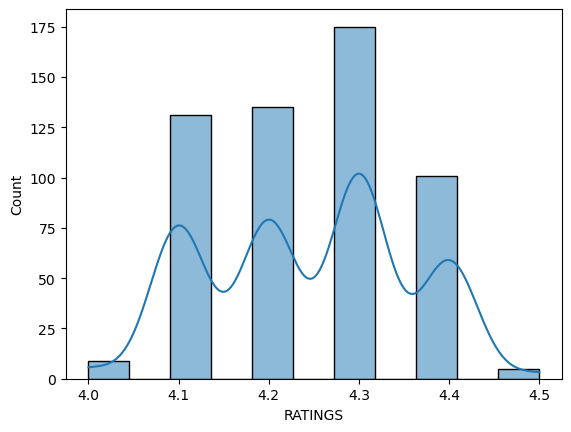

In [72]:
sns.histplot(df,x='RATINGS',kde=True)

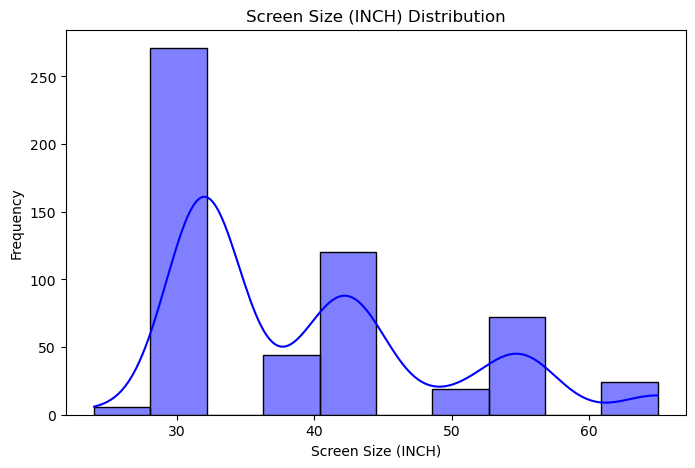

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(df["INCH"], bins=10, kde=True, color="blue")
plt.title("Screen Size (INCH) Distribution")
plt.xlabel("Screen Size (INCH)")
plt.ylabel("Frequency")
plt.show()

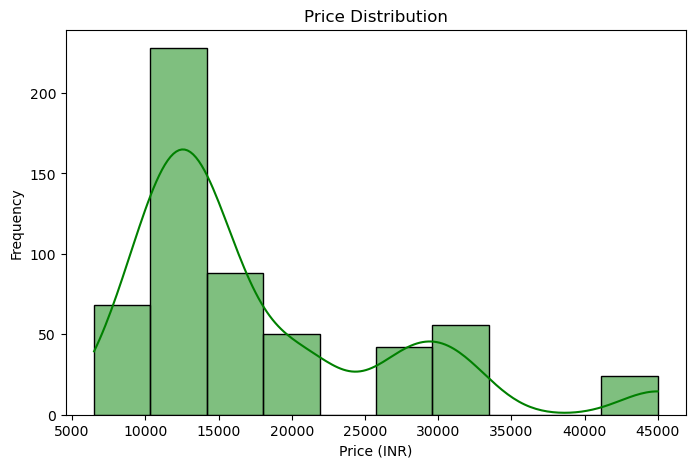

In [74]:
plt.figure(figsize=(8, 5))
sns.histplot(df["PRICE"], bins=10, kde=True, color="green")
plt.title("Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='WARRANTY(YRS)', ylabel='Density'>

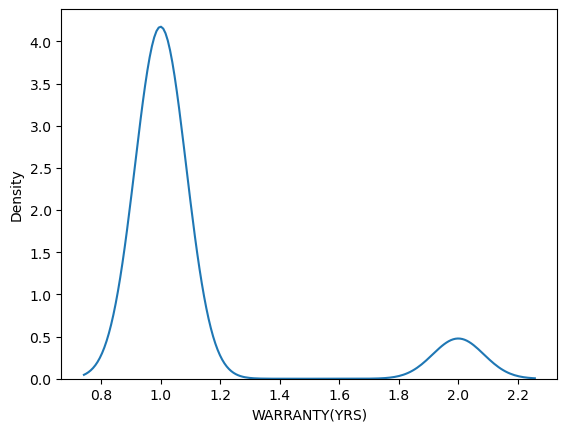

In [75]:
sns.kdeplot(df['WARRANTY(YRS)'])

<Axes: >

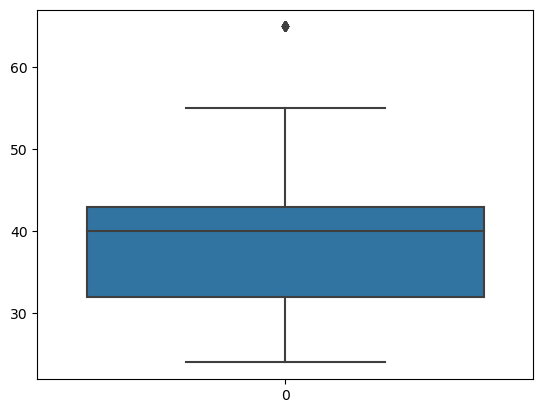

In [77]:
sns.boxplot(df['INCH'])

<Axes: >

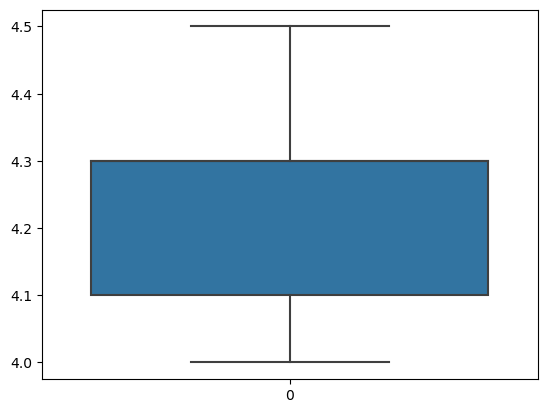

In [78]:
sns.boxplot(df['RATINGS'])

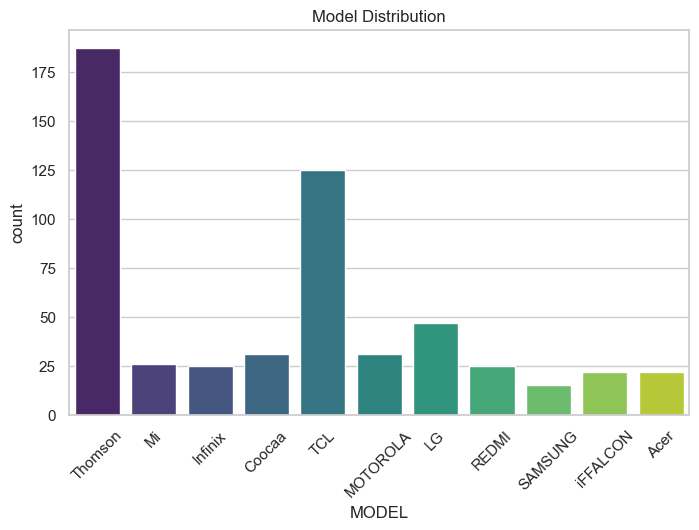

In [80]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="MODEL", palette="viridis")
plt.title("Model Distribution")
plt.xticks(rotation=45)
plt.show()

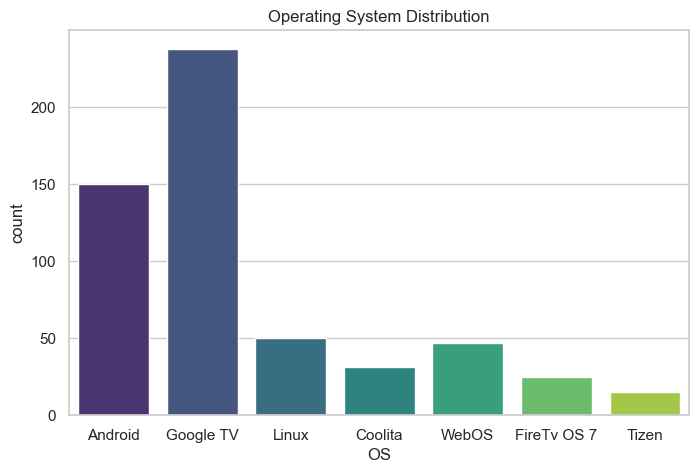

In [81]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="OS", palette="viridis")
plt.title("Operating System Distribution")
plt.show()

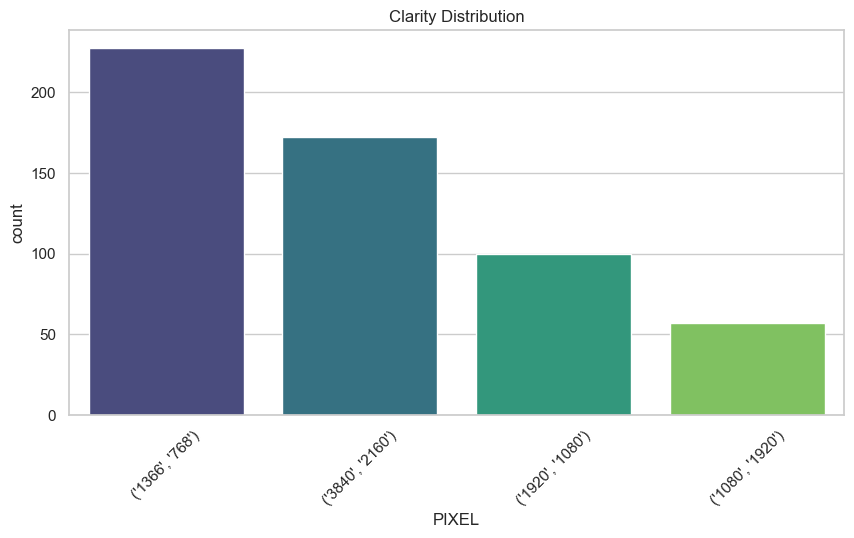

In [88]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PIXEL", palette="viridis")
plt.title("Clarity Distribution")
plt.xticks(rotation=45)
plt.show()

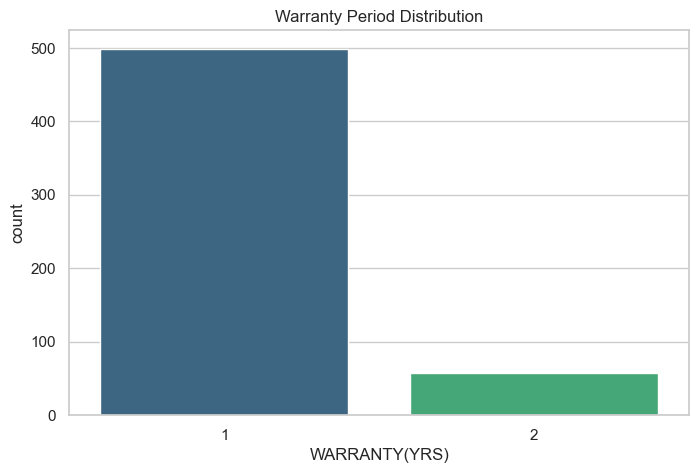

In [89]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="WARRANTY(YRS)", palette="viridis")
plt.title("Warranty Period Distribution")
plt.show()

## BIVARIATE

<Axes: xlabel='PRICE', ylabel='Count'>

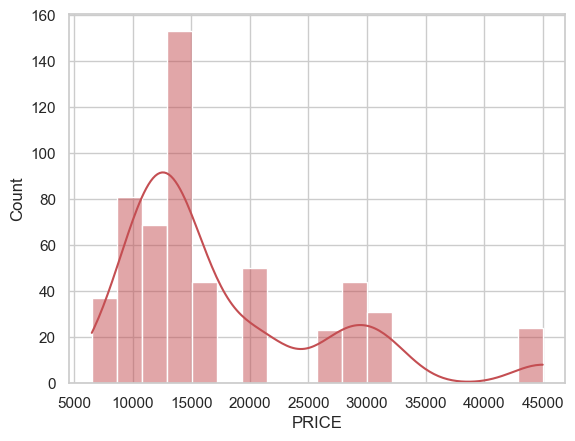

In [94]:
sns.histplot(df,x='PRICE',kde=True,color='r')

<Axes: xlabel='OS', ylabel='MODEL'>

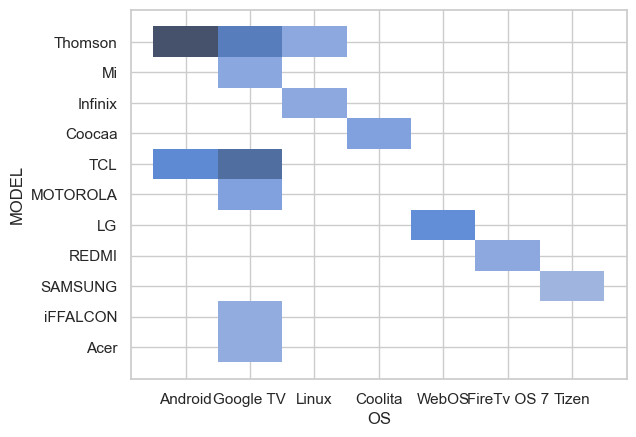

In [96]:
sns.histplot(df,x='OS',y='MODEL')

<Axes: xlabel='MODEL', ylabel='LAUNCHYEAR'>

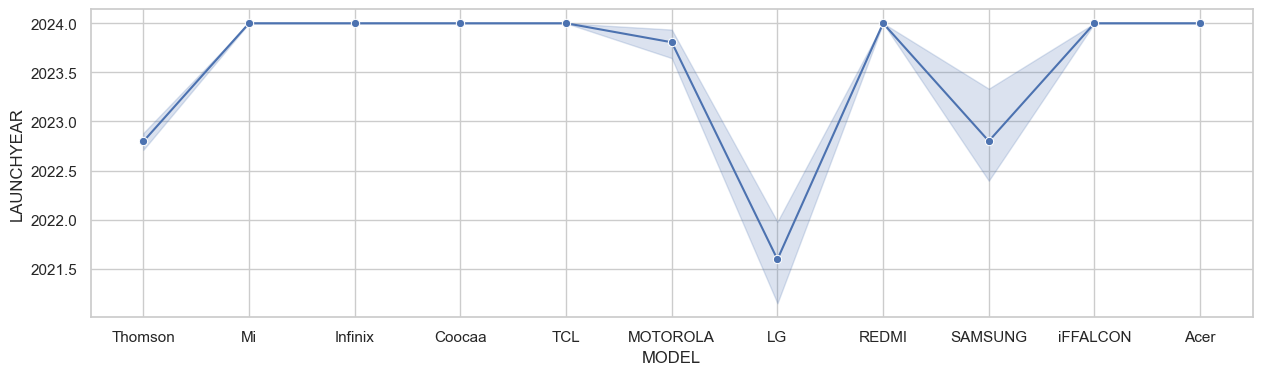

In [104]:
plt.figure(figsize=(15,4))
sns.lineplot(df,x='MODEL',y='LAUNCHYEAR',marker='o')

<Axes: xlabel='INCH', ylabel='PRICE'>

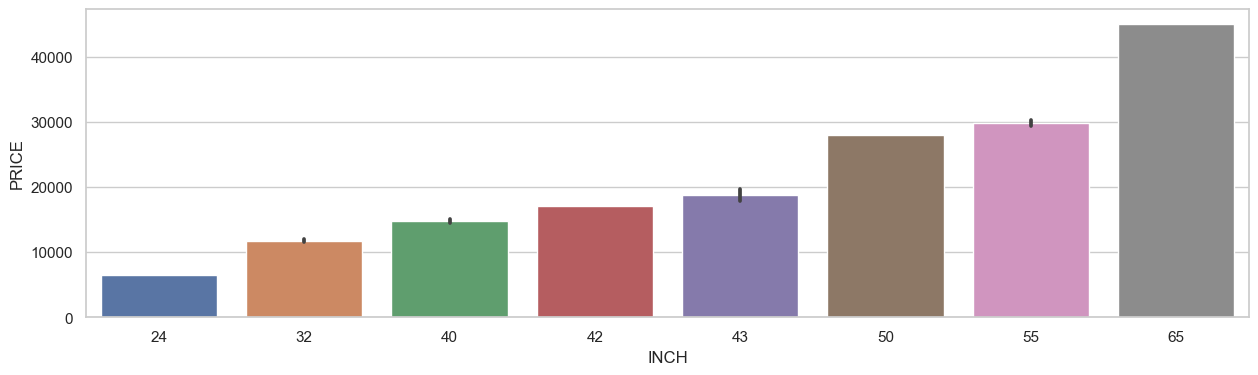

In [116]:
plt.figure(figsize=(15,4))

sns.barplot(df,x='INCH',y='PRICE')

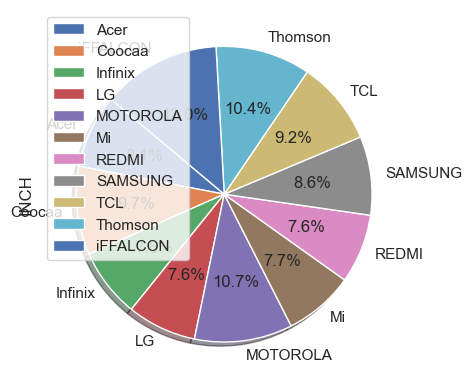

In [124]:
grouping3 = df.groupby(by='MODEL')[['INCH']].mean()
grouping3
grouping3['INCH'] = grouping3['INCH'].abs()
grouping3.plot.pie(y='INCH',labels=grouping3.index,autopct='%1.1f%%',startangle=140,shadow=True)
plt.show()

In [137]:
grouping3

,INCH
MODEL,
Acer,34.181818
Coocaa,40.870968
Infinix,32.000000
LG,32.000000
MOTOROLA,45.322581
Mi,32.423077
REDMI,32.000000
SAMSUNG,36.400000
TCL,38.800000


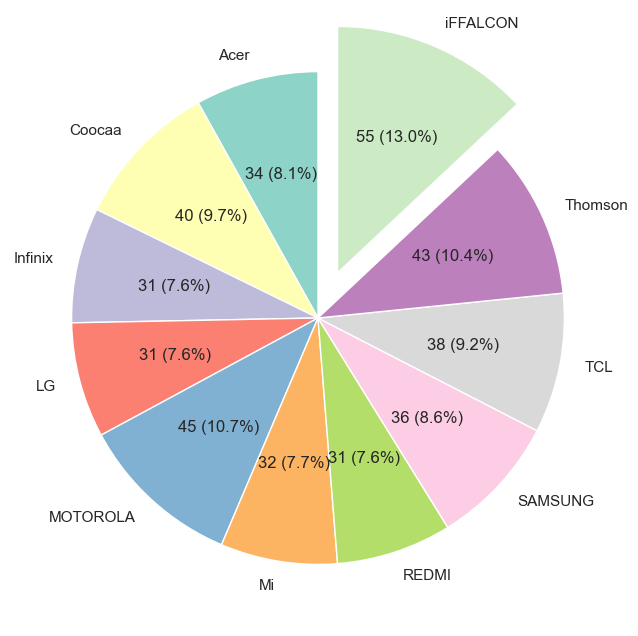

In [161]:
sizes = grouping3['INCH']
labels = grouping3.index
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)'
myexplode = [0, 0, 0, 0,0,0,0,0,0,0,0.2]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=90,colors=sns.color_palette('Set3'),explode=myexplode)

plt.show()

<Axes: xlabel='RATINGS', ylabel='MODEL'>

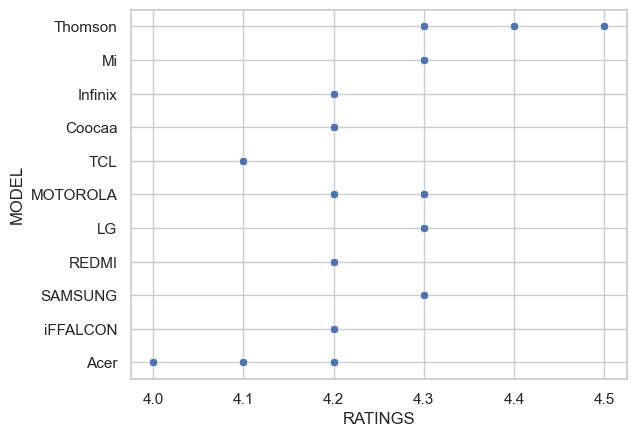

In [162]:
sns.scatterplot(df,x='RATINGS',y='MODEL')

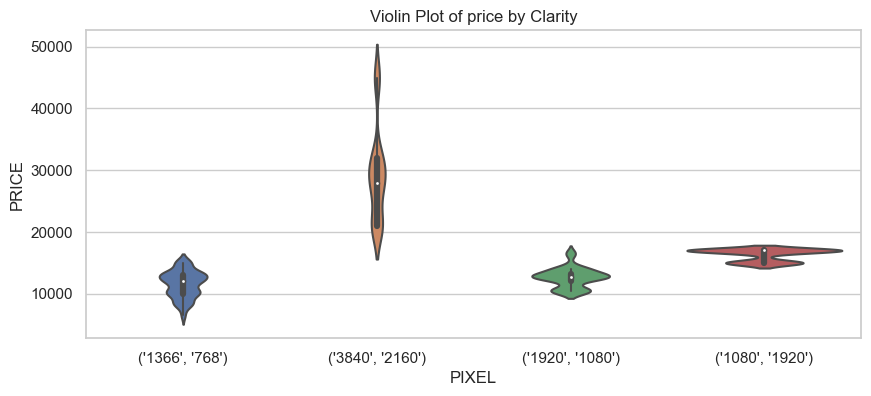

In [170]:
plt.figure(figsize=(10,4))
sns.violinplot(x='PIXEL', y='PRICE',data=df)
plt.title('Violin Plot of price by Clarity')
plt.show()

## MULTIVARIATE

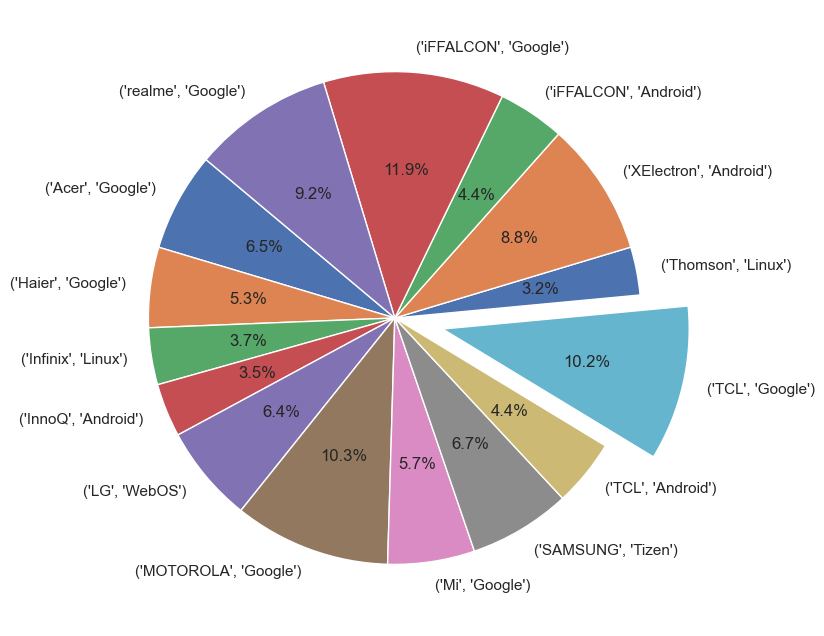

In [125]:
grouping3 = df1.groupby(by=['model','OS'])[['ratings','price']].mean()
grouping3
myexplode = [0, 0, 0, 0,0,0,0,0,0,0.2,0,0,0,0,0]
plt.figure(figsize=(10, 8))
plt.pie(grouping3['price'],labels=grouping3.index, 
        autopct='%1.1f%%',  # Format to show percentage
        startangle=140,
        explode=myexplode)
plt.show() 


<Axes: >

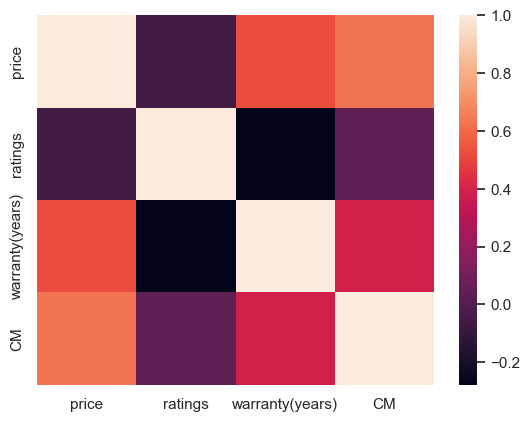

In [51]:
corr = df1[[ 'price', 'ratings','warranty(years)','CM' ]].corr()
sns.heatmap(corr)

C:\Users\kaval\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


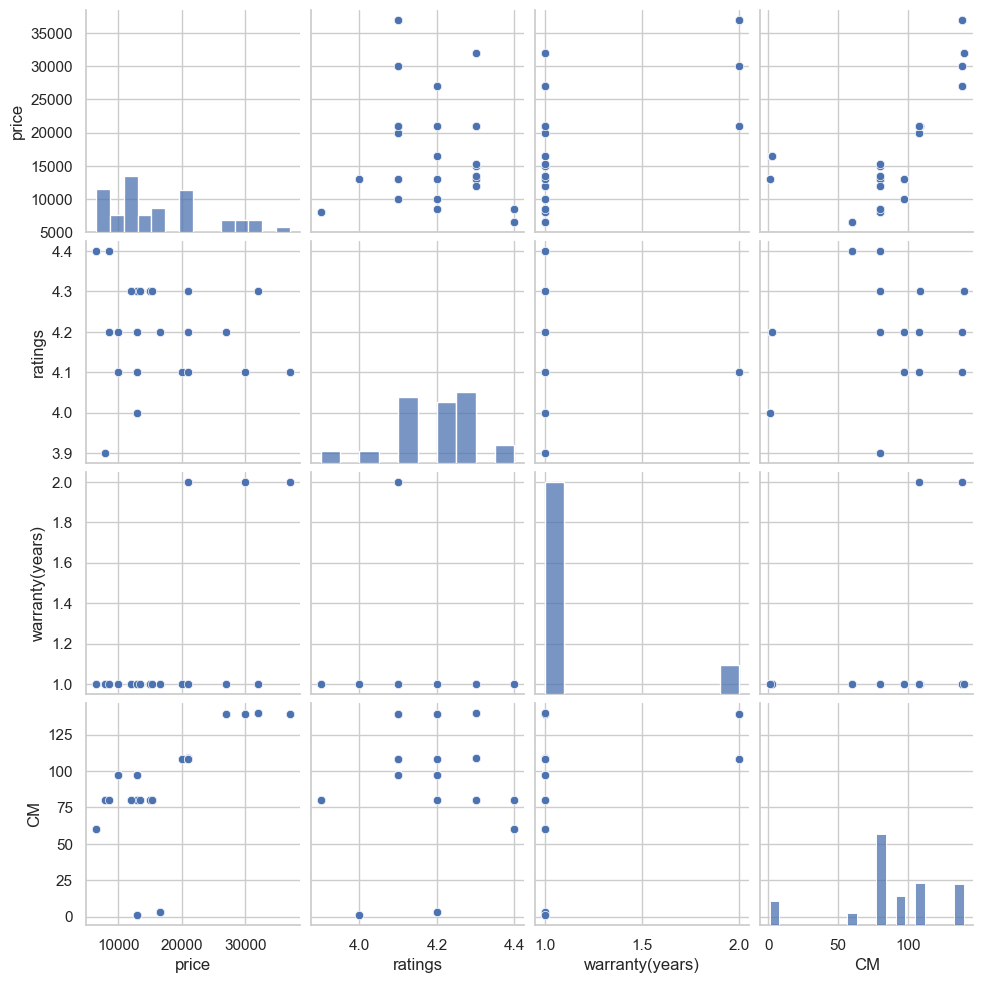

In [52]:
sns.pairplot(df1[['price', 'ratings','warranty(years)','CM' ]])

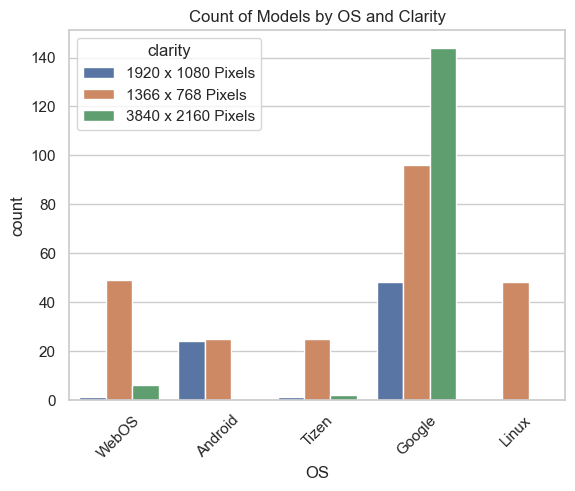

In [199]:
sns.countplot(x='OS', hue='clarity', data=df1)
plt.title('Count of Models by OS and Clarity')
plt.xticks(rotation=45)
plt.show()

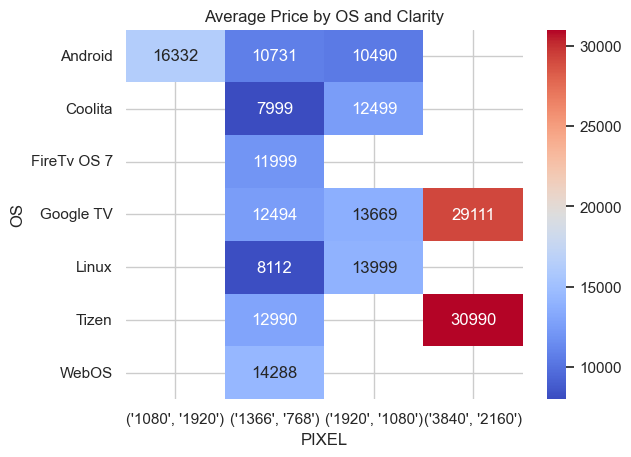

In [202]:
pivot = df.pivot_table(index='OS', columns='PIXEL', values='PRICE', aggfunc='mean')

# Plot heatmap
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Average Price by OS and Clarity')
plt.show()

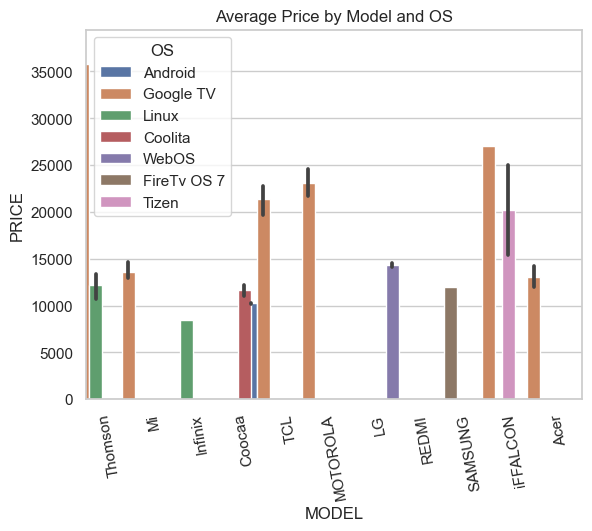

In [192]:

sns.barplot(x='MODEL', y='PRICE', hue='OS', data=df,width=2)
plt.title('Average Price by Model and OS')
plt.xticks(rotation=100)
plt.show()

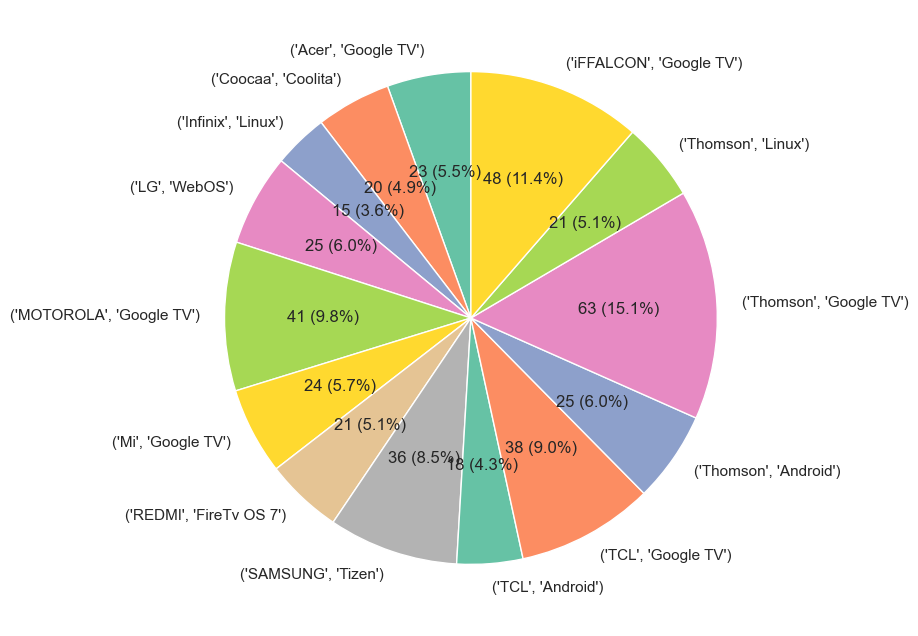

In [219]:
grouping4 = df.groupby(by=['MODEL','OS'])[['RATINGS','PRICE']].mean()
grouping4
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)'

plt.figure(figsize=(10, 8))
total_values = grouping4.sum(axis=1)
plt.pie(total_values,labels=grouping4.index,autopct=lambda pct: func(pct, sizes), startangle=90,colors=sns.color_palette('Set2')
        )
plt.show() 

<Axes: ylabel='Count'>

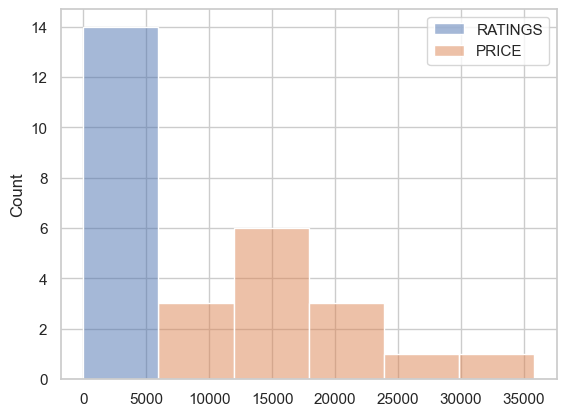

In [220]:
sns.histplot(grouping4)